# Paper: Modeling polio as a disease of development

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

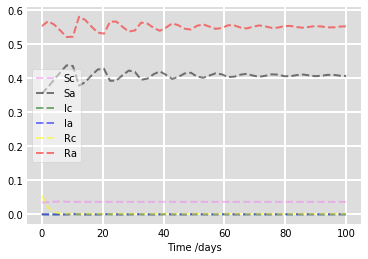

In [7]:
# Initial conditions
Sc0 = 0.0355
Sa0 = 0.3550
Ic0 = 0.0003
Ia0 = 0
Rc0 = 0.0554
Ra0 = 0.5538
Na = Sa0 + Ia0 + Ra0
Nc = Sc0 + Ic0 + Rc0
N = Nc + Na 

# A grid of time points (in days)
t = np.linspace(0, 100, 50) 

#parameters
mu = 0.02
alpha = 0.5
gamma_a = 18
gamma_c = 36
beta_aa = 40
beta_cc = 90
beta_ac = 0
beta_ca = 0


# The SIR model differential equations.
def deriv(y, t, N, Nc, Na, mu ,alpha ,gamma_a ,gamma_c ,beta_aa ,beta_cc ,beta_ac ,beta_ca):
    Sc  ,Sa  ,Ic  ,Ia  ,Rc  ,Ra = y
 
    dScdt = mu*N - (alpha+mu+(beta_cc/Nc) *Ic + (beta_ca/Nc) *Ia) * Sc
    dSadt = alpha*Sc - (mu + (beta_aa/Na)*Ia + (beta_ac/Na)*Ic)*Sa
    dIcdt = ((beta_cc/Nc)*Ic + (beta_ca/Nc)*Ia)*Sc - (gamma_c+alpha+mu)*Ic
    dIadt = ((beta_ac/Na)*Ic + (beta_aa/Na)*Ia)*Sa - (gamma_a+mu)*Ia +alpha*Ic
    dRcdt = gamma_c*Ic - mu*Rc - alpha*Rc
    dRadt = gamma_a*Ia - mu*Ra + alpha*Rc

    return  dScdt  ,dSadt  ,dIcdt  ,dIadt  ,dRcdt  ,dRadt 


# Initial conditions vector
y0 = Sc0  ,Sa0  ,Ic0  ,Ia0  ,Rc0  ,Ra0 
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, Nc, Na, mu ,alpha ,gamma_a ,gamma_c ,beta_aa ,beta_cc ,beta_ac ,beta_ca))
Sc  ,Sa  ,Ic  ,Ia  ,Rc  ,Ra  = ret.T

# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, Sc, 'violet', alpha=0.5, lw=2, label='Sc', linestyle='dashed')
ax.plot(t, Sa, 'black', alpha=0.5, lw=2, label='Sa', linestyle='dashed')
ax.plot(t, Ic, 'darkgreen', alpha=0.5, lw=2, label='Ic', linestyle='dashed')
ax.plot(t, Ia, 'blue', alpha=0.5, lw=2, label='Ia', linestyle='dashed')
ax.plot(t, Rc, 'yellow', alpha=0.5, lw=2, label='Rc', linestyle='dashed')
ax.plot(t, Ra, 'red', alpha=0.5, lw=2, label='Ra', linestyle='dashed')

ax.set_xlabel('Time /days')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [8]:
#save to csv file
a = np.asarray([t, Sc  ,Sa  ,Ic  ,Ia  ,Rc  ,Ra]) 

# np.savetxt("polio.csv", a, delimiter=",")